# My DCT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack as fft
from joblib import Parallel, delayed
from time import time
import os

In [4]:
test = [231, 32, 233, 161, 24, 71, 140, 245]
dct_test = fft.dct(test, norm='ortho')
dct_test

array([ 401.9902051 ,    6.60001991,  109.16736544, -112.78557857,
         65.40737726,  121.83139804,  116.65648855,   28.80040722])

In [5]:
mat = [[231, 32, 233, 161, 24, 71, 140, 245], 
         [247, 40, 248, 245, 124, 204, 36, 107], 
         [234, 202, 245, 167, 9, 217, 239, 173], 
         [193, 190, 100, 167, 43, 180, 8, 70], 
         [11, 24, 210, 177, 81, 243, 8, 112], 
         [97, 195, 203, 47, 125, 114, 165, 181], 
         [193, 70, 174, 167, 41, 30, 127, 245], 
         [87, 149, 57, 192, 65, 129, 178, 228]]

In [6]:
def dct2(A):
    return fft.dct(fft.dct(A, axis=0, norm='ortho'), axis=1, norm='ortho')

print(dct2(mat))

[[ 1.11875000e+03  4.40221926e+01  7.59190503e+01 -1.38572411e+02
   3.50000000e+00  1.22078055e+02  1.95043868e+02 -1.01604906e+02]
 [ 7.71900790e+01  1.14868206e+02 -2.18014421e+01  4.13641351e+01
   8.77720598e+00  9.90829620e+01  1.38171516e+02  1.09092795e+01]
 [ 4.48351537e+01 -6.27524464e+01  1.11614114e+02 -7.63789658e+01
   1.24422160e+02  9.55984194e+01 -3.98287969e+01  5.85237670e+01]
 [-6.99836647e+01 -4.02408945e+01 -2.34970508e+01 -7.67320594e+01
   2.66457750e+01 -3.68328290e+01  6.61891485e+01  1.25429731e+02]
 [-1.09000000e+02 -4.33430857e+01 -5.55436908e+01  8.17347083e+00
   3.02500000e+01 -2.86602437e+01  2.44149822e+00 -9.41437025e+01]
 [-5.38783591e+00  5.66345009e+01  1.73021519e+02 -3.54234494e+01
   3.23878249e+01  3.34576728e+01 -5.81167864e+01  1.90225615e+01]
 [ 7.88439693e+01 -6.45924096e+01  1.18671203e+02 -1.50904840e+01
  -1.37316928e+02 -3.06196663e+01 -1.05114114e+02  3.98130497e+01]
 [ 1.97882438e+01 -7.81813409e+01  9.72311860e-01 -7.23464180e+01
  -

matrices = []
for N in range(1, 50, 1):
    matrices.append(np.random.randint(0, 300, size=(N, N)))

In [7]:
def new_matrix(N):
    return np.random.randint(0, 255, size=(N, N))
matrices = Parallel(n_jobs=5)(delayed(new_matrix)(N) for N in (2**p for p in range(1, 11)))

In [8]:
def my_dct(v):
    N = len(v)
    a = [0] * N
    for k in range(0, N):
        for i in range(0, N):
            a[k] += np.cos(np.pi * k * ((2 * i + 1) / (2 * N))) * v[i]
        den = N / 2
        if(k == 0): den = N
        a[k] = (a[k] / np.sqrt(den))
    return a

def my_dct2(A):
    N = len(A)
    mr = np.zeros((N, N))
    mc = np.zeros((N, N))
    for i in range(0, N):
        mr[i] = my_dct(A[i])
    for j in range(0, N):
        mc[:, j] = my_dct(mr[:, j])
    return mc
    
print(my_dct2(mat))

[[ 1.11875000e+03  4.40221926e+01  7.59190503e+01 -1.38572411e+02
   3.50000000e+00  1.22078055e+02  1.95043868e+02 -1.01604906e+02]
 [ 7.71900790e+01  1.14868206e+02 -2.18014421e+01  4.13641351e+01
   8.77720598e+00  9.90829620e+01  1.38171516e+02  1.09092795e+01]
 [ 4.48351537e+01 -6.27524464e+01  1.11614114e+02 -7.63789658e+01
   1.24422160e+02  9.55984194e+01 -3.98287969e+01  5.85237670e+01]
 [-6.99836647e+01 -4.02408945e+01 -2.34970508e+01 -7.67320594e+01
   2.66457750e+01 -3.68328290e+01  6.61891485e+01  1.25429731e+02]
 [-1.09000000e+02 -4.33430857e+01 -5.55436908e+01  8.17347083e+00
   3.02500000e+01 -2.86602437e+01  2.44149822e+00 -9.41437025e+01]
 [-5.38783591e+00  5.66345009e+01  1.73021519e+02 -3.54234494e+01
   3.23878249e+01  3.34576728e+01 -5.81167864e+01  1.90225615e+01]
 [ 7.88439693e+01 -6.45924096e+01  1.18671203e+02 -1.50904840e+01
  -1.37316928e+02 -3.06196663e+01 -1.05114114e+02  3.98130497e+01]
 [ 1.97882438e+01 -7.81813409e+01  9.72311860e-01 -7.23464180e+01
  -

In [16]:
def dct(vector):
    N = len(vector)
    cosine_vector = np.zeros(N)

    for k in range(N):
        for n in range(N):
            cosine_vector[k] += vector[n] * np.cos((np.pi * k * (2 * n + 1)) / (2 * N))
        
        if k == 0:
            scaling_factor = np.sqrt(1/N)
        else:
            scaling_factor = np.sqrt(2/N)
        
        cosine_vector[k] *= scaling_factor
            
    return cosine_vector


x = np.random.random((256, 256)) * 255
x = x.astype(np.uint8)


def dct2(matrix):
    N = matrix.shape[0]
    dct_matrix = np.zeros((N, N))
    
    for i in range(N):
        dct_matrix[i] = dct(matrix[i])
    
    for j in range(N):
        dct_matrix[:, j] = dct(dct_matrix[:, j])
    
    return dct_matrix

dct2(x)


array([[ 3.24331250e+04,  6.46687303e+01, -6.98970046e+01, ...,
        -7.43382828e+01, -9.64098491e+01,  4.91783599e+01],
       [ 1.36983860e+02,  1.39844124e+01,  3.38226495e+01, ...,
        -3.37163504e+01, -1.36285663e+02, -5.93970609e+00],
       [-1.41963719e+02, -8.57701298e+00,  2.52642326e+01, ...,
         7.98721220e+01,  3.71904343e+01, -3.31980219e+01],
       ...,
       [ 1.01105905e+00, -3.03817117e+01, -1.04828702e+02, ...,
        -1.02496584e+02, -4.92684403e+01,  1.72747374e+01],
       [-4.26150803e+01, -7.42796733e+01, -5.14777569e+00, ...,
        -6.89778741e+01,  3.15466178e+01, -3.01287784e+01],
       [ 1.32512788e+02,  2.36129515e+02,  5.24463208e+01, ...,
         1.01702213e+02, -9.04100332e+01, -8.84627873e+01]])

times = list()
for m in matrices:
    start = time()
    dct2(m)
    end = time()
    time_dct2 = end - start
    start = time()
    my_dct2(m)
    end = time()
    time_my_dct2 = end - start
    times.append([len(m), time_dct2, time_my_dct2])

In [9]:
def process(mat):
    print("... Computing DCT2 - Matrix size: ", len(mat))
    start = time()
    dct2(mat)
    end = time()
    time_dct2 = end - start
    start = time()
    my_dct2(mat)
    end = time()
    time_my_dct2 = end - start
    print("DONE Computed DCT2 - Matrix size: ", len(mat))
    return [len(mat), time_dct2, time_my_dct2]

In [10]:
times = Parallel(n_jobs=7)(delayed(process)(m) for m in matrices)

N = str(len(matrices))
df = pd.DataFrame(times, columns=['N', 'DCT2 Time', 'My DCT2 Time'])
df.to_csv('times' + N + '.csv', index=False)

... Computing DCT2 - Matrix size:  2
DONE Computed DCT2 - Matrix size:  2
... Computing DCT2 - Matrix size:  128
... Computing DCT2 - Matrix size:  4
DONE Computed DCT2 - Matrix size:  4
... Computing DCT2 - Matrix size:  8
... Computing DCT2 - Matrix size:  16
DONE Computed DCT2 - Matrix size:  8
... Computing DCT2 - Matrix size:  512
... Computing DCT2 - Matrix size:  32
DONE Computed DCT2 - Matrix size:  16
... Computing DCT2 - Matrix size:  1024
... Computing DCT2 - Matrix size:  64
... Computing DCT2 - Matrix size:  256
DONE Computed DCT2 - Matrix size:  32
DONE Computed DCT2 - Matrix size:  64
DONE Computed DCT2 - Matrix size:  128
DONE Computed DCT2 - Matrix size:  256
DONE Computed DCT2 - Matrix size:  512


KeyboardInterrupt: 

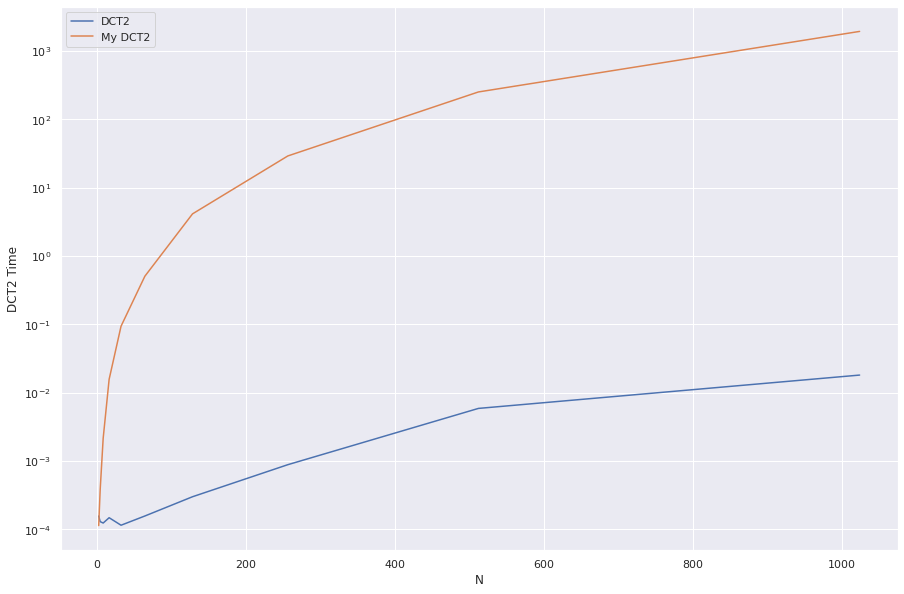

In [13]:
sns.set_theme(style="darkgrid")
df = pd.read_csv('times.csv')
#df = pd.DataFrame(times, columns=['N', 'DCT2 Time', 'My DCT2 Time'])
#fig, ax = plt.subplots(1, 2, figsize=(30, 10), sharey=True)
fig = plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x="N", y="DCT2 Time", legend='brief', label='DCT2')
ax = sns.lineplot(data=df, x="N", y="My DCT2 Time", legend='brief', label='My DCT2')
ax.set_yscale('log')
#ax2.set_yscale('log')
